In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
tf.reset_default_graph()
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/Users/yoon/Desktop/87_105_110_107/TP/MNIST/data', one_hot=True)

Extracting /Users/yoon/Desktop/87_105_110_107/TP/MNIST/data/train-images-idx3-ubyte.gz
Extracting /Users/yoon/Desktop/87_105_110_107/TP/MNIST/data/train-labels-idx1-ubyte.gz
Extracting /Users/yoon/Desktop/87_105_110_107/TP/MNIST/data/t10k-images-idx3-ubyte.gz
Extracting /Users/yoon/Desktop/87_105_110_107/TP/MNIST/data/t10k-labels-idx1-ubyte.gz


In [2]:
print("MNIST: ", mnist)
print("MNIST 트레인 데이터 사이즈:", mnist.train.num_examples)
print("MNIST 밸리데이션 데이터 사이즈:", mnist.validation.num_examples)
print("MNIST 테스트 데이터 사이즈:", mnist.test.num_examples)

MNIST:  Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x118de79e8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1064a00b8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1064a0240>)
MNIST 트레인 데이터 사이즈: 55000
MNIST 밸리데이션 데이터 사이즈: 5000
MNIST 테스트 데이터 사이즈: 10000


In [3]:
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [4]:
print(len(mnist.train.images[0]))

784


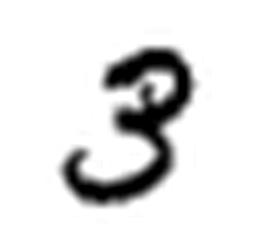

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = mnist.train.images[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="bessel")
plt.axis("off")
plt.show()

import numpy as np


In [6]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
              interpolation="neareast")
    plt.axis("off")

In [7]:
import numpy as np
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    #make a empty space
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

(28, 28)
(28, 140)
(196, 280)
(28, 280)


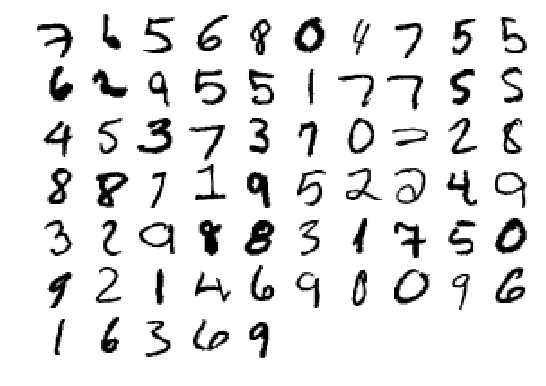

In [8]:
plt.figure(figsize=(9,9))
examples = np.r_[mnist.train.images[:12000:600],
                 mnist.train.images[13000:40000:600]]
size = 28
images_per_row=10
images_per_row = min(len(examples), images_per_row)
images = [example.reshape(size, size) for example in examples]
print(images[0].shape)
n_rows = (len(examples) - 1) // images_per_row + 1
row_images = []
n_empty = n_rows * images_per_row - len(examples)
images.append(np.zeros((size, size * n_empty)))
print(images[65].shape)
for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))
image = np.concatenate(row_images, axis=0)
print(image.shape)
plt.imshow(image, cmap = matplotlib.cm.binary)
plt.axis("off")
print(row_images[1].shape)


In [9]:
#필요한 hyperparameter
learning_rate = 0.01
batch_size = 128
n_epochs = 30

#홀더.
X = tf.placeholder(tf.float32, shape=[batch_size, 784], name='X_placeholder')
Y = tf.placeholder(tf.float32, shape=[batch_size, 10], name='Y_placeholder')

#weights and bias
W = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name='bias')

#logits
logits = tf.matmul(X,W) + b

#loss
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
loss = tf.reduce_mean(entropy)

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [11]:
from datetime import datetime
import time

now = datetime.now().strftime("%Y%m%d%H%M")
root_logdir = "/Users/yoon/Desktop/87_105_110_107/TP/MNIST/graphs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [12]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter(logdir, sess.graph)
    
    start_time = time.time()
    sess.run(tf.global_variables_initializer())
    #변수 설정
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs): #모델을 n_epochs 만큼 훈련
        total_loss = 0
        
        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch})
            total_loss += loss_batch
            
        print('Epoch {}  평균 손실: {:3.5f}'.format(i, total_loss/n_batches))
        
    print('총 소요 시간: {:5.2f}초'.format(time.time() - start_time))
    
    print('최적화 완료!')
    
    #테스트!
    
    preds = tf.nn.softmax(logits) #정규화
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
    accurate_ones = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
    
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0.0
    
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accurate_ones_batch = sess.run(accurate_ones, feed_dict={X: X_batch, Y:Y_batch})
        total_correct_preds += accurate_ones_batch
        
    print('정확도: {:1.5f}'.format(total_correct_preds/mnist.test.num_examples))
    
    writer.close()

Epoch 0  평균 손실: 1.28991
Epoch 1  평균 손실: 0.73380
Epoch 2  평균 손실: 0.60127
Epoch 3  평균 손실: 0.53669
Epoch 4  평균 손실: 0.49758
Epoch 5  평균 손실: 0.47117
Epoch 6  평균 손실: 0.45064
Epoch 7  평균 손실: 0.43623
Epoch 8  평균 손실: 0.42335
Epoch 9  평균 손실: 0.41348
Epoch 10  평균 손실: 0.40439
Epoch 11  평균 손실: 0.39662
Epoch 12  평균 손실: 0.38988
Epoch 13  평균 손실: 0.38452
Epoch 14  평균 손실: 0.37815
Epoch 15  평균 손실: 0.37417
Epoch 16  평균 손실: 0.37119
Epoch 17  평균 손실: 0.36574
Epoch 18  평균 손실: 0.36250
Epoch 19  평균 손실: 0.36074
Epoch 20  평균 손실: 0.35649
Epoch 21  평균 손실: 0.35284
Epoch 22  평균 손실: 0.35066
Epoch 23  평균 손실: 0.34943
Epoch 24  평균 손실: 0.34674
Epoch 25  평균 손실: 0.34391
Epoch 26  평균 손실: 0.34211
Epoch 27  평균 손실: 0.33945
Epoch 28  평균 손실: 0.33786
Epoch 29  평균 손실: 0.33695
총 소요 시간: 20.80초
최적화 완료!
정확도: 0.91180
